<h1>MIDTERMS EXAM - CHICAGO CRIMES DATA ANALYTICS PROJECT</h1>

<h2>Analyst: Gerald Prio</h2>
<h2>BSIT-3C</h2>

In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
warnings.filterwarnings('ignore')

In [2]:
crimes = pd.read_csv('datasets\\Chicago_Crimes.csv')

In [3]:
crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


<h2>Descriptive Analytics</h2>

In [4]:
crimes.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.491230e+05,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000
mean,1.358652e+07,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845
std,6.473192e+05,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875
min,2.807300e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567
25%,1.352322e+07,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071
50%,1.361560e+07,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690
75%,1.370865e+07,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233
max,1.381045e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531


<H2>Null Values</H2>

In [5]:
crimes.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

<h2>DataFrame Summary</h2>

In [6]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    249123 non-null  int64  
 1   Case Number           249123 non-null  object 
 2   Date                  249123 non-null  object 
 3   Block                 249123 non-null  object 
 4   IUCR                  249123 non-null  object 
 5   Primary Type          249123 non-null  object 
 6   Description           249123 non-null  object 
 7   Location Description  248266 non-null  object 
 8   Arrest                249123 non-null  bool   
 9   Domestic              249123 non-null  bool   
 10  Beat                  249123 non-null  int64  
 11  District              249123 non-null  int64  
 12  Ward                  249123 non-null  int64  
 13  Community Area        249120 non-null  float64
 14  FBI Code              249123 non-null  object 
 15  

<h2>Filling Up Null Values</h2>

In [7]:
crimes['Location Description'] = crimes['Location Description'].fillna(crimes['Location Description'].mode()[0])
crimes['Community Area'] = crimes['Community Area'].fillna(crimes['Community Area'].mode()[0])
crimes['X Coordinate'] = crimes['X Coordinate'].fillna(crimes['X Coordinate'].mode()[0])
crimes['Y Coordinate'] = crimes['Y Coordinate'].fillna(crimes['Y Coordinate'].mode()[0])
crimes['Latitude'] = crimes['Latitude'].fillna(crimes['Latitude'].mode()[0])
crimes['Longitude'] = crimes['Longitude'].fillna(crimes['Longitude'].mode()[0])
crimes['Location'] = crimes['Location'].fillna(crimes['Location'].mode()[0])

crimes.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

<h2>Changing Data Types</h2>

In [8]:
crimes["Case Number"] = crimes["Case Number"].astype("category")
crimes['Date'] = pd.to_datetime(crimes['Date'], dayfirst=True, errors='coerce')
crimes["Block"] = crimes["Block"].astype("category")
crimes["IUCR"] = crimes["IUCR"].astype("category")
crimes["Primary Type"] = crimes["Primary Type"].astype("category")
crimes["Description"] = crimes["Description"].astype("category")
crimes["Location Description"] = crimes["Location Description"].astype("category")
crimes["FBI Code"] = crimes["FBI Code"].astype("category")
crimes['Updated On'] = pd.to_datetime(crimes['Updated On'], dayfirst=True, errors='coerce')
crimes["Location"] = crimes["Location"].astype("category")

<h2>Extracting Date Information Using Pandas Date Time</h2>

In [9]:
crimes['Year'] = crimes['Date'].dt.year
crimes['Month'] = crimes['Date'].dt.month
crimes['Month_Name'] = crimes['Date'].dt.month_name()
crimes['Day'] = crimes['Date'].dt.day
crimes['Week'] = crimes['Date'].dt.isocalendar().week
crimes['Day_Name'] = crimes['Date'].dt.day_name()
crimes['Hour'] = crimes['Date'].dt.hour

crimes.dtypes

ID                               int64
Case Number                   category
Date                    datetime64[ns]
Block                         category
IUCR                          category
Primary Type                  category
Description                   category
Location Description          category
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                 float64
FBI Code                      category
X Coordinate                   float64
Y Coordinate                   float64
Year                             int32
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                      category
Month                            int32
Month_Name                      object
Day                              int32
Week                     

<h1>Question and Insights</h1>

<h3>1. What are the most common types of crimes in Chicago, and which categories appear most frequently in the dataset?</h3>

In [10]:
crimes.groupby("Primary Type").size().sort_values(ascending=False).head()

Primary Type
THEFT                  59201
BATTERY                44579
CRIMINAL DAMAGE        27094
ASSAULT                22615
MOTOR VEHICLE THEFT    19604
dtype: int64

<h2>INSIGHT 1:</h2> 
<p>The data shows that the most common crimes in Chicago are theft, battery, and criminal damage. This means people mostly report crimes related to stealing and personal harm. These types of crimes make up a big part of all the cases in the city.</p>

<h3>2. In which year did Chicago record the highest number of crimes, and what might this indicate about overall crime trends?</h3>

In [11]:
crimes.groupby(crimes['Date'].dt.year).size().sort_values(ascending=False).head(1)

Date
2024    188918
dtype: int64

<h2>INSIGHT 2:</h2> 
<p>Chicago had the highest number of crimes in 2024, reaching 188,918 cases. This suggests that crime was more common that year compared to others, which could reflect either more actual criminal activity or improvements in reporting and policing systems.</p>

<h3>3. Which month of the year tends to have the most crimes in Chicago, and why might that be the case?</h3>

In [12]:
crimes.groupby(crimes['Date'].dt.month).size().sort_values(ascending=False).head(1)

Date
7    22957
dtype: int64

<h2>INSIGHT 3:</h2> 
<p>July has the highest crime cases, which means summer months are riskier. Since more people go out and gather during this time, it can lead to more problems. It proves that crime can change depending on the season.</p>

<h3>4. Which specific streets or blocks in Chicago report the highest number of incidents, and what does that reveal about recurring local hotspots? </h3>

In [13]:
crimes.groupby('Block').size().sort_values(ascending=False).head(10)

Block
001XX N STATE ST       668
0000X N STATE ST       463
0000X W TERMINAL ST    440
044XX N BROADWAY       328
076XX S CICERO AVE     304
011XX S CANAL ST       301
0000X E GRAND AVE      275
057XX S CICERO AVE     272
0000X S STATE ST       272
026XX N ELSTON AVE     269
dtype: int64

<h2>INSIGHT 4:</h2> 
<p>The block with the most crimes is 001XX N State St, followed by 0000X N State St and W Terminal St. These places keep showing up in the data, which means they are crime hotspots.</p>
<h2>INSIGHT 5:</h2> 
<p>Most of these streets are busy areas where lots of people pass by, like downtown or near transport spots. This could explain why crime is more common there since crowded places often bring more chances for incidents.</p>

<h3>5. What weapons or methods are most commonly used in robbery incidents in Chicago, and how do those methods differ across common locations?</h3>

In [14]:
crimes[crimes['Primary Type']=='ROBBERY'].groupby('Description').size().sort_values(ascending=False).head(10)

Description
ARMED - HANDGUN                       3203
STRONG ARM - NO WEAPON                2231
AGGRAVATED VEHICULAR HIJACKING         587
ARMED - KNIFE / CUTTING INSTRUMENT     451
AGGRAVATED                             445
ARMED - OTHER DANGEROUS WEAPON         327
ATTEMPT ARMED - HANDGUN                263
ATTEMPT STRONG ARM - NO WEAPON         222
VEHICULAR HIJACKING                    215
ARMED - OTHER FIREARM                   86
dtype: int64

<h2>INSIGHT 6:</h2> 
<p>Most robberies in Chicago happen with a handgun total of 3203, followed by cases where no weapon was used. This shows that guns and physical force are the most common methods.</p>
<h2>INSIGHT 7:</h2> 
<p>Other methods like car hijacking, knives, or other weapons are reported less often. This means while they do happen, most robberies are still either with guns or just using strength without weapons.</p>

<h3>6. How do crime patterns change across the calendar year which months have consistently higher or lower average counts?</h3>

In [15]:
crimes.groupby([crimes['Date'].dt.year, crimes['Date'].dt.month]).size().unstack(level=0).mean(axis=1).sort_values(ascending=False).head(12)

Date
7     11478.5
5     11316.5
6     10982.0
8     10955.5
9     10845.0
10    10828.0
1     10172.0
3     10171.0
4      9985.5
11     9694.5
12     9436.5
2      8696.5
dtype: float64

<h2>INSIGHT 8:</h2> 
<p>The data shows that July, May, and June have the highest average crime numbers. This means crime is usually more common in the summer months.</p>
<h2>INSIGHT 9:</h2> 
<p>February has the lowest crime counts, while months like November and December are also lower. This suggests crime tends to slow down during colder months of the year.</p>

<h3>7. Which FBI crime codes are most frequent, and what broad offenses do they represent?</h3>

In [16]:
fbi_codes = crimes['FBI Code'].value_counts().head(10)
fbi_codes

FBI Code
06     60380
08B    37090
14     27094
07     19604
08A    19009
26     18855
11     13534
03      8200
04B     7851
04A     7473
Name: count, dtype: int64

<h2>INSIGHT 10:</h2> 
<p>The data above shows that FBI code 06 (larceny/theft) is the most frequent with over 60,000 cases, followed by 08B (simple assault) and 14 (criminal damage). This means most crimes in Chicago are related to theft and property damage, while violent offenses like assault are also very common.</p>

<h3>8. How does the geographic center of incidents shift year to year, and what might that movement imply?</h3>

In [17]:
crimes.groupby(crimes['Date'].dt.year)[['Latitude','Longitude']].mean()

,Latitude,Longitude
Date,,
2024,41.847496,-87.668824
2025,41.845977,-87.669018


<h2>INSIGHT 11:</h2> 
<p>The average crime location in 2024 was at latitude 41.8475 and longitude -87.6688, while in 2025 it shifted slightly south and west to 41.8460, -87.6690. This small movement suggests that crime hotspots are relatively stable but can drift slightly year to year.</p>

<h3>9. What time of day sees the most battery incidents?</h3>

In [18]:
battery = crimes[crimes["Primary Type"]=="BATTERY"]
battery_hours = battery.groupby(battery["Date"].dt.hour).size().sort_values(ascending=False).head(10)
battery_hours

Date
0     2692
15    2496
20    2351
16    2303
18    2299
19    2287
17    2285
21    2274
23    2240
22    2166
dtype: int64

<h2>INSIGHT 12:</h2> 
<p>The highest number of battery incidents happened around midnight (0 hour/12am) with over 2,600 cases, showing that late-night hours are especially risky.</p>
<h2>INSIGHT 13:</h2> 
<p>Afternoon to evening hours (3 PM–11 PM) also show high numbers, suggesting that social activities and public interactions during these times contribute to more conflicts.</p>

<h3>10. Which motor vehicle theft locations are most common, and when do they occur most often?</h3>

In [19]:
mv = crimes[crimes["Primary Type"]=="MOTOR VEHICLE THEFT"]
mv_locations = mv["Location Description"].value_counts().head(5)
mv_hours = mv.groupby(mv["Date"].dt.hour).size().sort_values(ascending=False).head(5)
mv_locations, mv_hours

(Location Description
 STREET                                    14550
 PARKING LOT / GARAGE (NON RESIDENTIAL)     1562
 VEHICLE NON-COMMERCIAL                      614
 RESIDENCE                                   523
 ALLEY                                       473
 Name: count, dtype: int64,
 Date
 0     1403
 22    1331
 21    1265
 20    1207
 19    1146
 dtype: int64)

<h2>INSIGHT 14:</h2> 
<p>Most vehicle thefts happened on the street with more than 14,000 cases, which shows cars parked outside are the easiest targets. Parking lots and garages were also frequent spots, meaning even designated parking areas are not always safe.</p>
<h2>INSIGHT 15:</h2> 
<p>The highest number of thefts happened around midnight (0 hour/12am) with 1,403 cases, followed by late evening hours between 7 PM and 11 PM. These times are likely when cars are left. It shows that criminals take advantage of nighttime when visibility and activity are lower.</p>

<h3>11. How do theft incidents vary by hour of the day in Chicago, and what does this reveal about daily crime patterns?</h3>

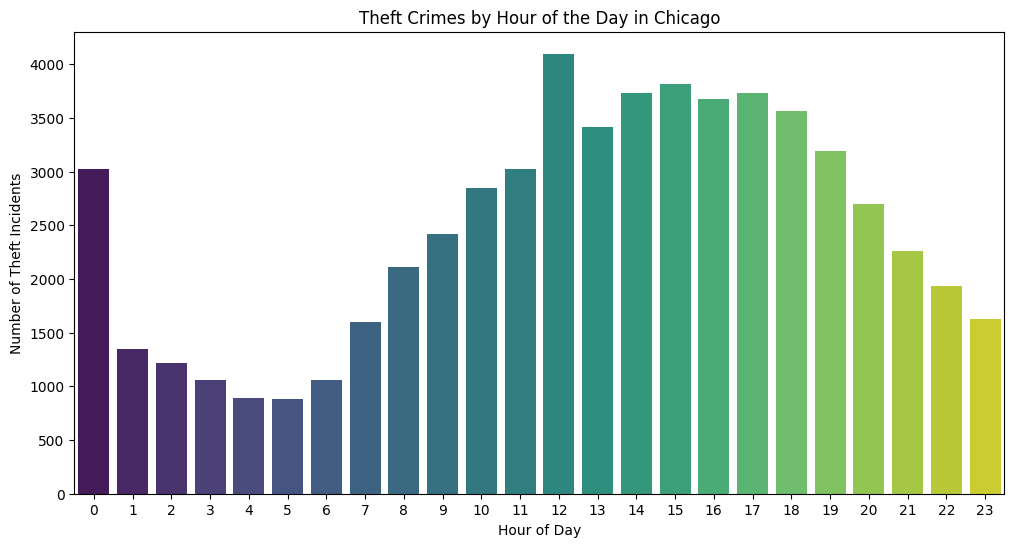

In [20]:
theft = crimes[crimes['Primary Type'] == 'THEFT'].copy()
theft['Hour'] = theft['Date'].dt.hour

plt.figure(figsize=(12,6))
sns.countplot(data=theft, x='Hour', palette='viridis')
plt.title('Theft Crimes by Hour of the Day in Chicago')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Theft Incidents')
plt.show()

<h2>INSIGHT 16:</h2> 
<p>Based on the data above, we can see that theft crimes are highest around noon and stay high through the afternoon until evening. This shows that theft usually happens when people are outside doing activities like shopping or traveling. Overall, it tells us that daytime is the most risky period for theft compared to night.</p>
<h2>INSIGHT 17:</h2> 
<p>Based on the data above,the fewest thefts happen between 3 AM and 6 AM, which makes sense because most people are sleeping at that time. This drop shows that theft follows the daily routine of people being out less during those hours. Overall, it means criminals act more when there are more people and chances for theft.</p>

<H3>12. What are the seasonal patterns of burglary crimes in Chicago across months?</H3>

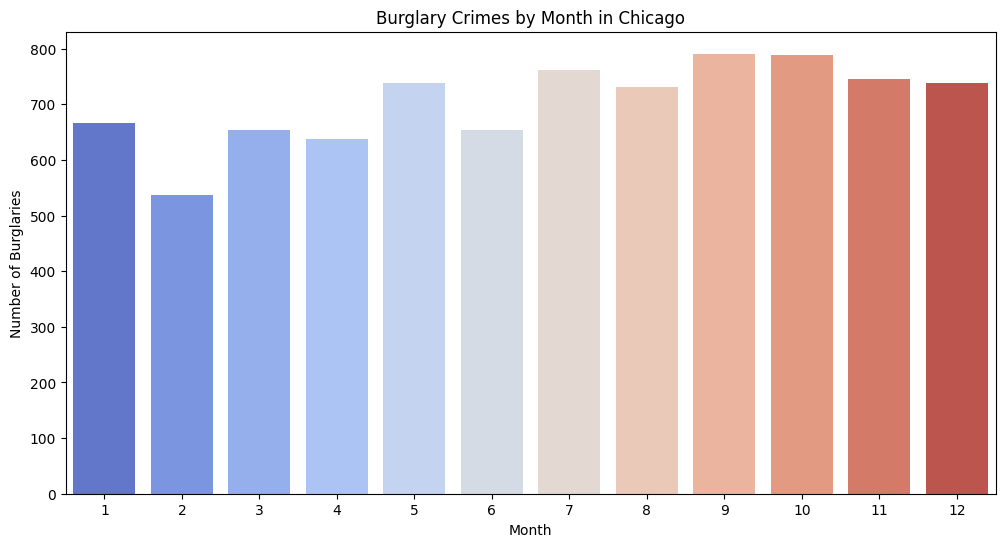

In [21]:
burglary = crimes[crimes['Primary Type']=='BURGLARY'].copy()
burglary['Month'] = burglary['Date'].dt.month

plt.figure(figsize=(12,6))
sns.countplot(data=burglary, x='Month', palette='coolwarm')
plt.title('Burglary Crimes by Month in Chicago')
plt.xlabel('Month')
plt.ylabel('Number of Burglaries')
plt.show()

<h2>INSIGHT 18:</h2> 
<p>Based on the data above, burglary cases are higher in the later months, especially around September and October. This shows that burglary tends to rise as the year goes on. Overall, the end of the year looks more risky compared to the start.</p>
<h2>INSIGHT 19:</h2> 
<p>Based on the data above, February has the lowest number of burglaries out of all months. This might be because it’s colder and people stay inside more. Overall, burglary happens less in the winter and more as the year moves forward.</p>

<h3>13. How do narcotics-related crimes vary by day of the week in Chicago?</h3>

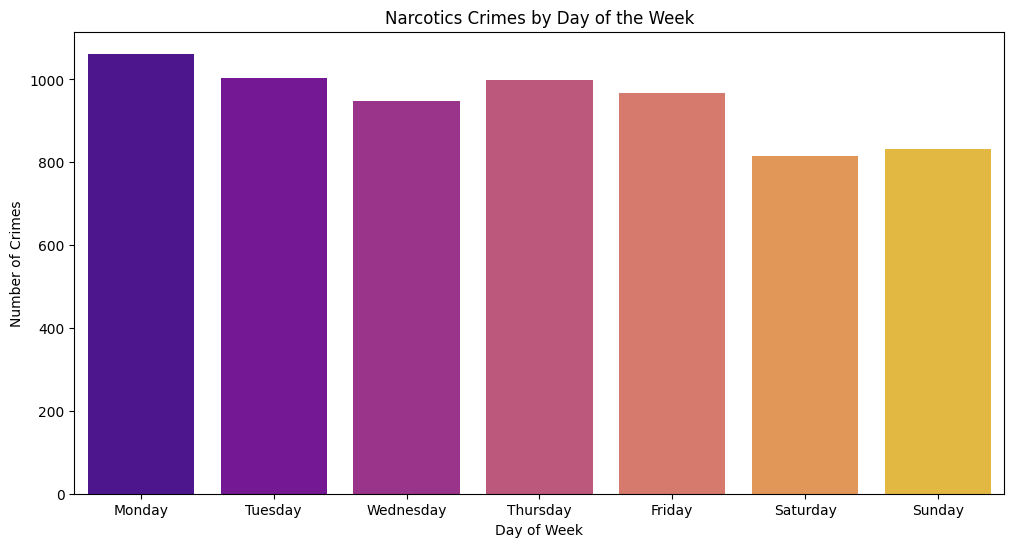

In [22]:
narcotics = crimes[crimes['Primary Type']=='NARCOTICS'].copy()
narcotics['DayOfWeek'] = narcotics['Date'].dt.day_name()

plt.figure(figsize=(12,6))
sns.countplot(data=narcotics, x='DayOfWeek', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='plasma')
plt.title('Narcotics Crimes by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.show()

<h2>INSIGHT 20:</h2> 
<p>Based on the data above, Monday has the most narcotics crimes, followed by Tuesday and Thursday. This means drug cases are more common at the start of the week. Overall, weekdays show higher activity compared to weekends.</p>
<h2>INSIGHT 21:</h2> 
<p>Based on the data above, Saturday has the lowest number of narcotics crimes, with Sunday also being low. This shows that drug crimes slow down on weekends. Overall, most narcotics incidents happen during the workweek.</p>

<h3>14. What is the monthly trend of assault crimes in Chicago?</h3>

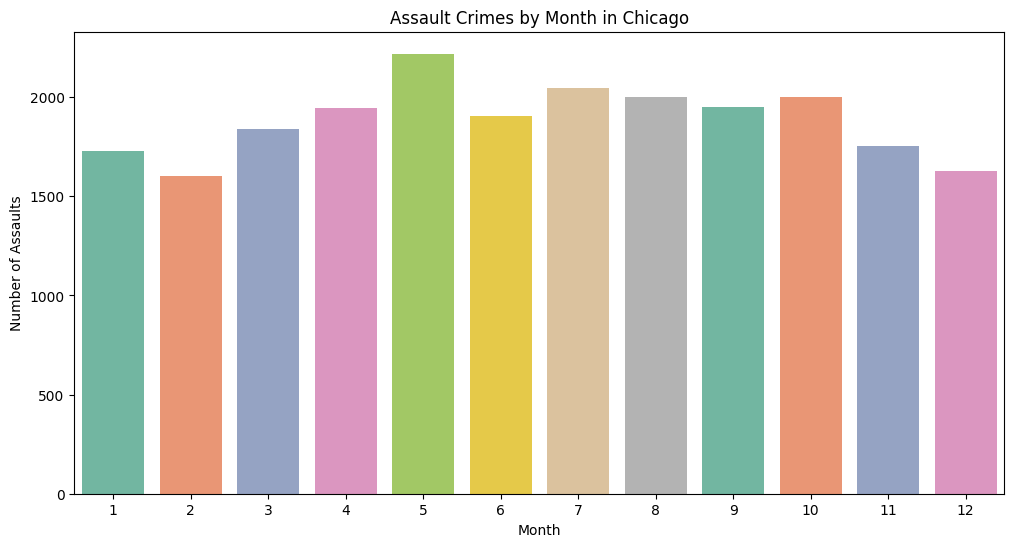

In [23]:
assault = crimes[crimes['Primary Type']=='ASSAULT'].copy()
assault['Month'] = assault['Date'].dt.month

plt.figure(figsize=(12,6))
sns.countplot(data=assault, x='Month', palette='Set2')
plt.title('Assault Crimes by Month in Chicago')
plt.xlabel('Month')
plt.ylabel('Number of Assaults')
plt.show()

<h2>INSIGHT 22:</h2> 
<p>Based on the data above, assault crimes peak in May, making it the month with the highest number of cases. This shows that assaults tend to rise during late spring and early summer. Overall, May stands out as the most dangerous month for assaults compared to others.</p>
<h2>INSIGHT 23:</h2> 
<p>Based on the data above, the lowest assault numbers are seen in February and December. This suggests that colder months may reduce the number of assault incidents. Overall, assault cases appear higher in warmer months and lower when it’s winter.</p>

<h3>15. What is the monthly trend of arrests in Chicago across all crimes?</h3>

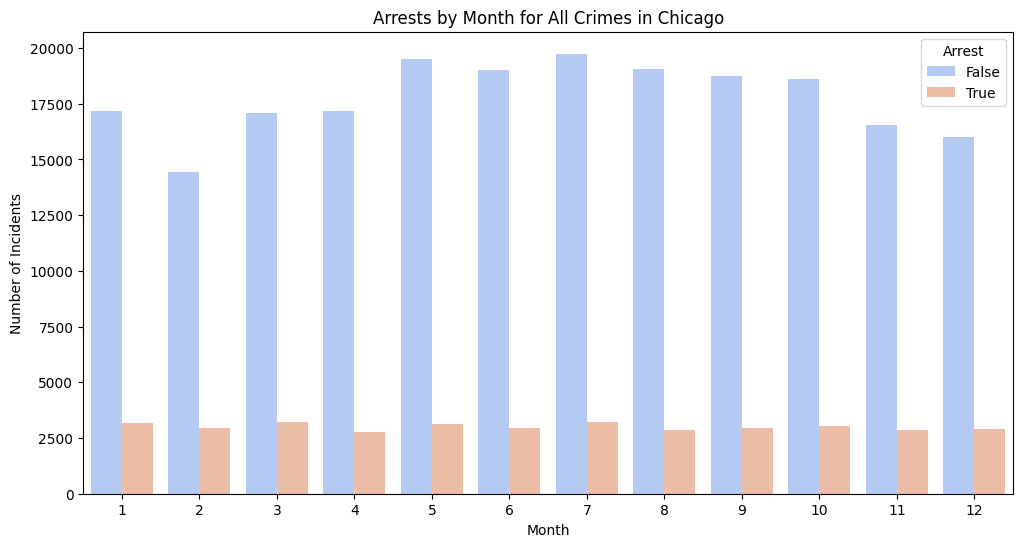

In [24]:
crimes['Month'] = crimes['Date'].dt.month

plt.figure(figsize=(12,6))
sns.countplot(data=crimes, x='Month', hue='Arrest', palette='coolwarm')
plt.title('Arrests by Month for All Crimes in Chicago')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.show()

<h2>INSIGHT 24:</h2> 
<p>Based on the data above, the number of crimes in Chicago is higher during the middle months of the year, especially around May to July. Arrests happen every month, but they are much fewer compared to the total number of crimes reported.</p>

<h3>16. Which primary crime types lead to the highest arrest rates?</h3>

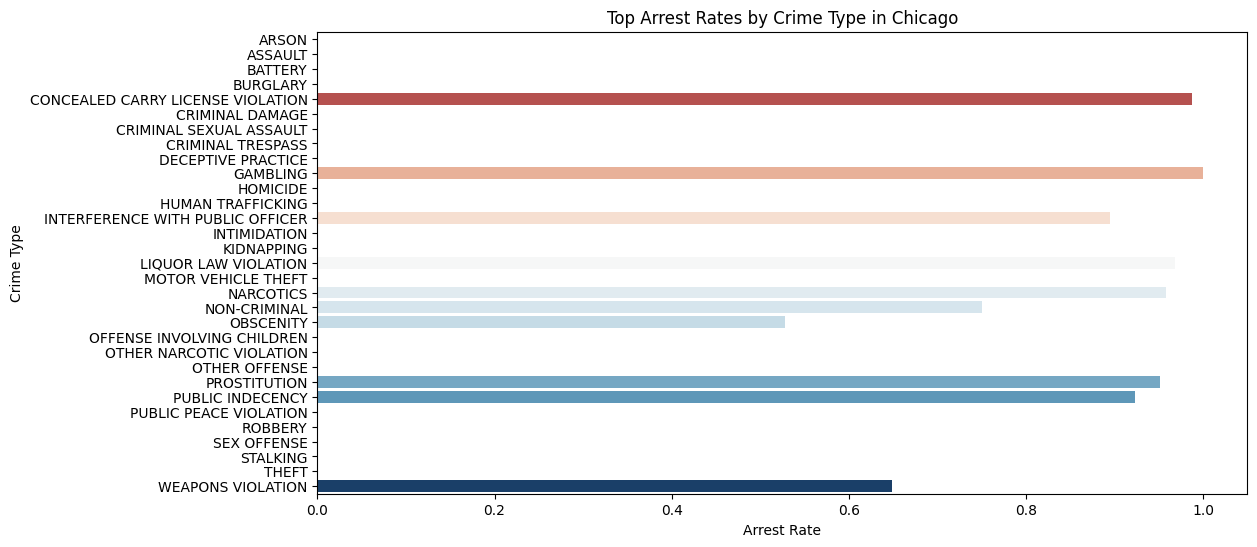

In [25]:
arrest_rates = crimes.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=arrest_rates.values, y=arrest_rates.index, palette='RdBu')
plt.title('Top Arrest Rates by Crime Type in Chicago')
plt.xlabel('Arrest Rate')
plt.ylabel('Crime Type')
plt.show()

<h2>INSIGHT 25:</h2> 
<p>The chart shows that gambling has the highest arrest rate among all crime types in Chicago, meaning nearly every recorded gambling case results in an arrest. This indicates that gambling is heavily enforced by authorities when it occurs.</p>

<h3>17. Which community areas in Chicago report the most crime incidents?</h3>

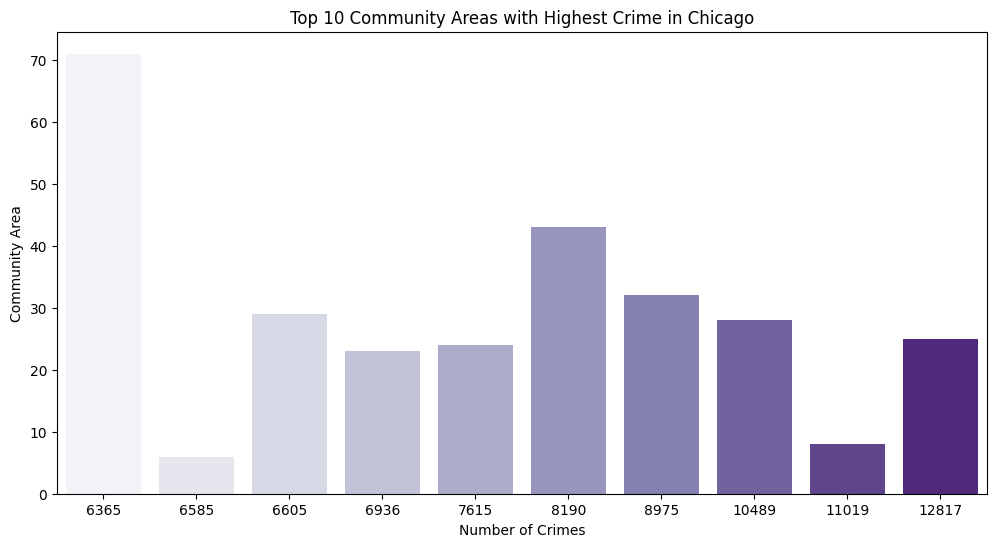

In [26]:
communities = crimes['Community Area'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=communities.values, y=communities.index, palette='Purples')
plt.title('Top 10 Community Areas with Highest Crime in Chicago')
plt.xlabel('Number of Crimes')
plt.ylabel('Community Area')
plt.show()

<h2>INSIGHT 26:</h2> 
<p>Based on the visualization above, some community areas, such as 6365 and 8190, report significantly higher numbers of crimes compared to others, marking them as hotspots for criminal activity. This suggests that crime is unevenly distributed across Chicago, with certain neighborhoods experiencing more frequent incidents that may require targeted interventions.</p>

<h3>18. How do weapons-related crimes trend across months in Chicago?</h3>

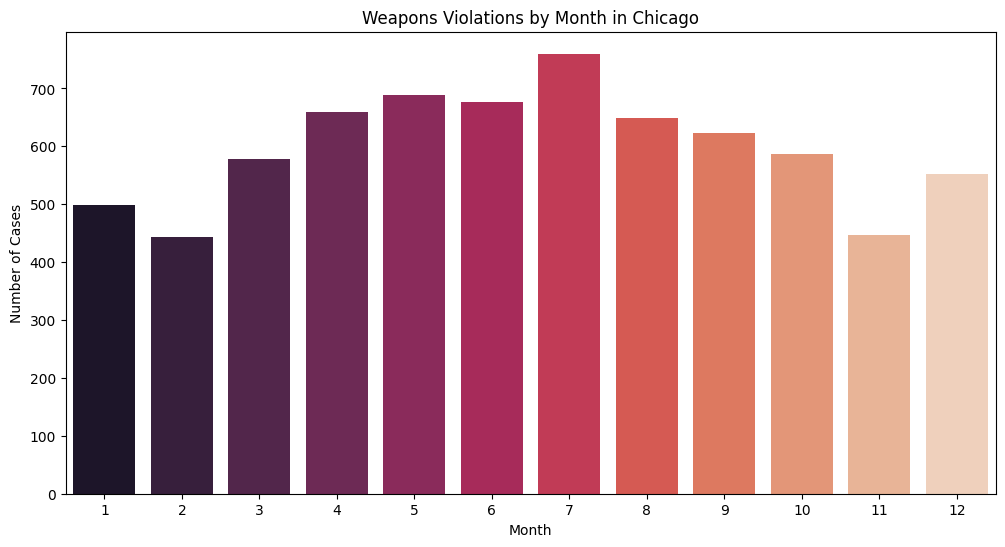

In [27]:
weapons = crimes[crimes['Primary Type']=='WEAPONS VIOLATION'].copy()
weapons['Month'] = weapons['Date'].dt.month

plt.figure(figsize=(12,6))
sns.countplot(data=weapons, x='Month', palette='rocket')
plt.title('Weapons Violations by Month in Chicago')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.show()

<h2>INSIGHT 27:</h2> 
<p>Based on the data above, weapons-related crimes in Chicago peak during the middle of the year, especially in May and July, while the lowest incidents occur in colder months like February and November.</p>

<h3>19. Which Chicago police districts report the most crimes overall?</h3>

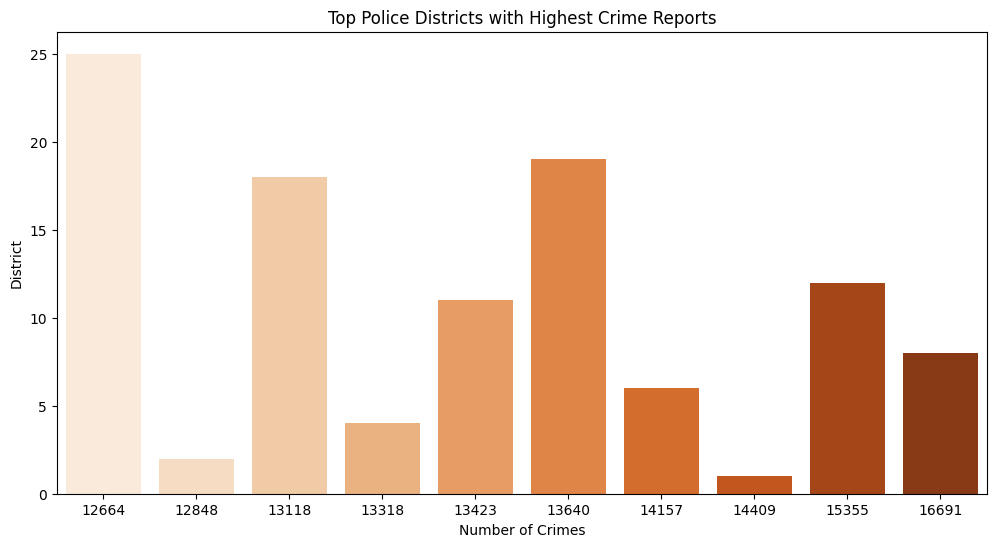

In [28]:
districts = crimes['District'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=districts.values, y=districts.index, palette='Oranges')
plt.title('Top Police Districts with Highest Crime Reports')
plt.xlabel('Number of Crimes')
plt.ylabel('District')
plt.show()

<h2>INSIGHT 28:</h2> 
<p>Based on the data above, certain districts, such as those with codes 12664 and 13640, consistently report the highest crime numbers, indicating that these areas may have higher population density or more active hotspots.</p>
<h2>INSIGHT 29:</h2> 
<p>On the other hand, districts like 12848 and 14409 have significantly lower reports, suggesting either lower crime prevalence or possibly underreporting in those regions.</p>

<h3>20. How does the number of crimes vary by day of the week in Chicago?</h3>

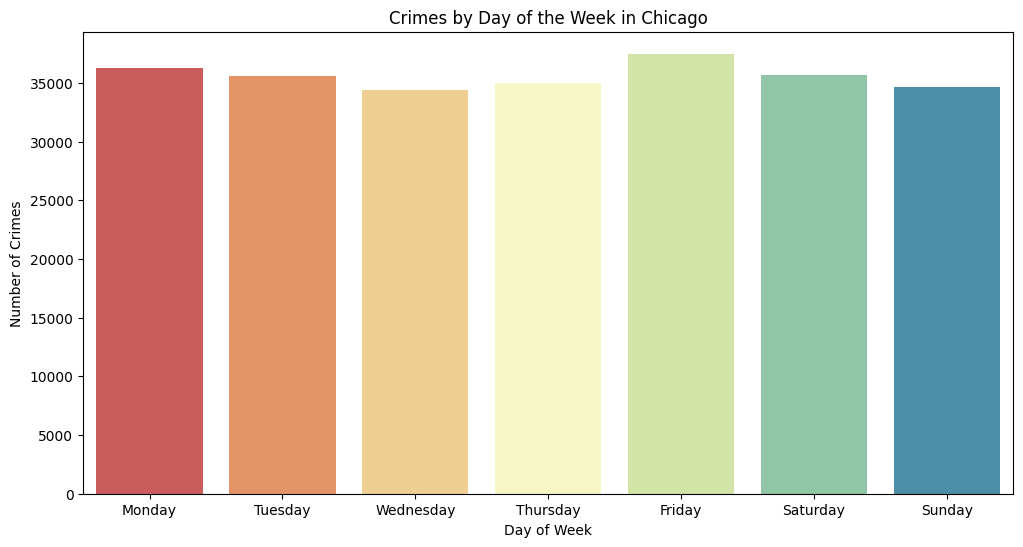

In [29]:
crimes['DayOfWeek'] = crimes['Date'].dt.day_name()

plt.figure(figsize=(12,6))
sns.countplot(data=crimes, x='DayOfWeek', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='Spectral')
plt.title('Crimes by Day of the Week in Chicago')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.show()

<h2>INSIGHT 30:</h2> 
<p>Based on visualization above, The number of crimes remains relatively steady throughout the week, but it tends to be highest on Fridays around 38000 crimes. Meanwhile, Sundays record the lowest number of incidents.</p>

<h2>DATA VISUALIZATION USING FOLIUM HEATMAP</h2>

<h3>21. District 6 Neighborhood Crime Map </h3>

In [30]:
district_6 = crimes[crimes["District"] == 6][["Latitude", "Longitude"]].dropna()
m6 = folium.Map(location=[district_6["Latitude"].mean(), district_6["Longitude"].mean()], zoom_start=12) 
HeatMap(district_6.values.tolist()).add_to(m6)  
m6.save("district_6_heatmap.html")

m6

<h2>INSIGHT 31:</h2> 
<p>In District 6, crimes happen more in residential areas and are scattered. This suggests everyday neighborhood problems like burglary or small disputes are common here.</p>

<h3>22. District 8 Crime Hotspot Map</h3> 

In [31]:
district_8 = crimes[crimes["District"] == 8][["Latitude", "Longitude"]].dropna() 
m8 = folium.Map(location=[district_8["Latitude"].mean(), district_8["Longitude"].mean()], zoom_start=12) 
HeatMap(district_8.values.tolist()).add_to(m8) 
m8.save("district_8_heatmap.html")

m8

<h2>INSIGHT 32:</h2> 
<p>The heatmap shows that crimes in District 8 are mostly gathered in busy areas. This means police may need to focus more on these hotspots to improve safety.</p>

<h3>23. District 1 Downtown Crime Map</h3>

In [32]:
district_1 = crimes[crimes["District"] == 1][["Latitude", "Longitude"]].dropna()
m1 = folium.Map(location=[district_1["Latitude"].mean(), district_1["Longitude"].mean()], zoom_start=12) 
HeatMap(district_1.values.tolist()).add_to(m1)
m1.save("district_1_heatmap.html")

m1

<h2>INSIGHT 33:</h2> 
<p>The heatmap for District 1 shows big clusters in the downtown area. This makes sense because downtown has more visitors, tourists, and shops, which can attract crimes like theft.</p>

<h3>24. District 19 Spread Crime Map</h3>

In [33]:
district_19 = crimes[crimes["District"] == 19][["Latitude", "Longitude"]].dropna()
m19 = folium.Map(location=[district_19["Latitude"].mean(), district_19["Longitude"].mean()], zoom_start=12) 
HeatMap(district_19.values.tolist()).add_to(m19) 
m19.save("district_19_heatmap.html")

m19

<h2>INSIGHT 34:</h2> 
<p>The heatmap shows crimes in District 19 are spread across different spots, not just one. This means safety efforts should cover the whole district, not just one hotspot.</p>

<h3>25. District 12 Crime Density Map</h3>

In [34]:
district_12 = crimes[crimes["District"] == 12][["Latitude", "Longitude"]].dropna() 
m12 = folium.Map(location=[district_12["Latitude"].mean(), district_12["Longitude"].mean()], zoom_start=12) 
HeatMap(district_12.values.tolist()).add_to(m12)
m12.save("district_12_heatmap.html")

m12

<h2>INSIGHT 35:</h2> 
<p>Most crimes in District 12 are clustered around central parts of the district. This tells us that places with more people and businesses often have more crimes.</p>